# Testing the newly setup environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn

In [2]:
# Print versions to confirm successful installation
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

print("\nEnvironment is ready for AI development.")

NumPy version: 2.4.0
Pandas version: 2.3.3
Matplotlib version: 3.10.8
Scikit-learn version: 1.8.0

Environment is ready for AI development.


### 1- Loading Dataset

In [4]:
df = pd.read_csv('data/student_performance.csv')
display(df.head())

,Study_Hours,Sleep_Hours,Final_Score
0,4.370861,5.968178,49.463935
1,9.556429,6.367178,93.559856
2,NaN,8.272737,89.193132
3,6.387926,5.700022,66.634088
4,2.404168,8.348248,51.493010


### 2- Initial Data Exploration and Cleaning

In [24]:
# checking for missing/ null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study_Hours  4799 non-null   float64
 1   Sleep_Hours  5050 non-null   float64
 2   Final_Score  5050 non-null   float64
dtypes: float64(3)
memory usage: 118.5 KB


In [16]:
# statistical check
print(f"statistical check:\n\n {df.describe()}")

statistical check:

        Study_Hours  Sleep_Hours  Final_Score
count  4799.000000  5050.000000  5050.000000
mean      5.458301     6.458821    66.432860
std       2.606560     1.426799    21.055152
min       1.000105     4.000264    15.709158
25%       3.177215     5.238384    48.767377
50%       5.490061     6.432313    66.816275
75%       7.685146     7.665256    84.316732
max       9.997459     8.997526   100.000000


In [21]:
# duplicate values check
print(f"duplicate values: {df.duplicated().sum()}")

duplicate values: 50


In [25]:
# Removing Duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
current_rows = len(df)
print(f"Removed {initial_rows - current_rows} duplicate rows.")

# Handling missing values
# We calculate the median (middle value) of Study_Hours
# If a student didn't report study hours, we assume they studied an 'average' amount.
fill_value = df['Study_Hours'].median()
print(f"Filling missing values with median: {fill_value:.2f} hours")

# Applying the fix
df['Study_Hours'] = df['Study_Hours'].fillna(fill_value)

# verification
print("structure after cleaning:")
df.info()

Removed 50 duplicate rows.
Filling missing values with median: 5.50 hours
structure after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study_Hours  5000 non-null   float64
 1   Sleep_Hours  5000 non-null   float64
 2   Final_Score  5000 non-null   float64
dtypes: float64(3)
memory usage: 156.2 KB


### 3- Data Visualization

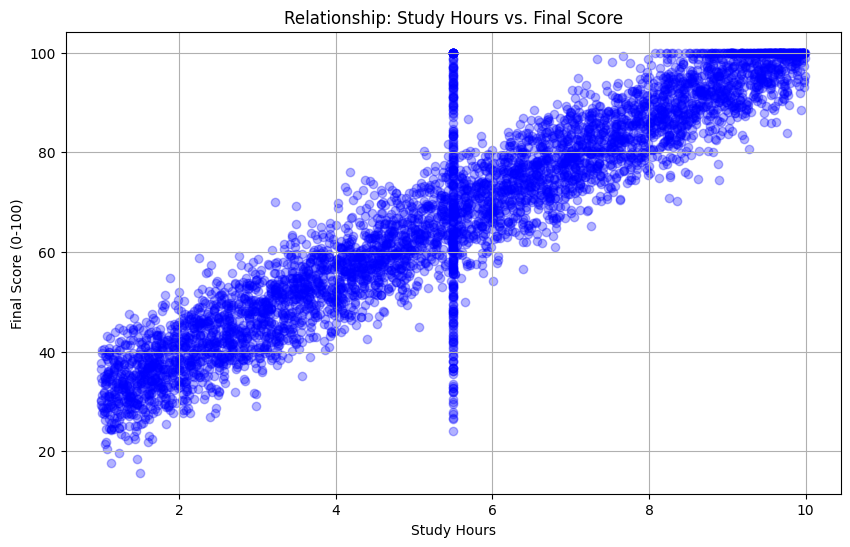

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting the data points
# alpha=0.3 is used to make the data points transparent
plt.scatter(df['Study_Hours'], df['Final_Score'], alpha=0.3, color='blue')

# adding labels and title
plt.title('Relationship: Study Hours vs. Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score (0-100)')
plt.grid(True)

# displaying the plot
plt.show()

### 4- Train_Test Split

In [31]:
from sklearn.model_selection import train_test_split

X = df[['Study_Hours', 'Sleep_Hours']]
y = df['Final_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

Training Data Shape: (4000, 2)
Testing Data Shape:  (1000, 2)


### 5- Model Selection and Training

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# initializing the model - Linear Regression
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# making prediction using test data
predictions = model.predict(X_test)

# model evaluation
# MAE: On average, how many points was the AI wrong by?
mae = mean_absolute_error(y_test, predictions)
# R2 Score: How "accurate" is the model? (1.0 is perfect, 0.0 is useless)
r2 = r2_score(y_test, predictions)

print(f"Model Trained Successfully!")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score (Accuracy):       {r2:.4f}")

Model Trained Successfully!
Mean Absolute Error (MAE): 4.56
R² Score (Accuracy):       0.8984


### 6- Interpretation of Model's Performance:
- R² Score '0.89' shows that the model has leanred 89% of the patterns from data successfully. The remaining is noise.
- MAE shows that the model predicts score is usually +/- 4 points.

### 7- Saving the trained Model

In [35]:
import joblib
import os

# Create a folder to store models
os.makedirs('models', exist_ok=True)
model_path = os.path.join('models', 'student_score_predictor.pkl')

# Saving the model
joblib.dump(model, model_path)
print(f"Model saved to: {model_path}")

# loading the model back from disk for verification
loaded_model = joblib.load(model_path)

# Let's predict a score for a specific student:
# Study: 8 hours, Sleep: 7 hours
new_student_data = [[8, 7]] 
prediction = loaded_model.predict(new_student_data)

print(f"\nTest Prediction for new student:")
print(f"Inputs: 8 hours study, 7 hours sleep")
print(f"Predicted Score: {prediction[0]:.2f} / 100")

Model saved to: models\student_score_predictor.pkl

Test Prediction for new student:
Inputs: 8 hours study, 7 hours sleep
Predicted Score: 87.21 / 100


c:\Users\tahir\Desktop\PythonTools\Week04_AI\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
